In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.model_selection import train_test_split
#import tensorflow as tf
from sklearn.metrics import roc_auc_score
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn import preprocessing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from joblib import Parallel, delayed
import joblib

In [3]:
df = pd.read_csv("C__Users_Bob_Desktop_my_data.csv")
df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
257669,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
257670,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
257671,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [4]:
from sklearn.utils import shuffle
df = shuffle(df,random_state=50)

In [5]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder1 = preprocessing.LabelEncoder()
df['proto']= label_encoder1.fit_transform(df['proto'])
  
df['proto'].unique()
label_encoder2 = preprocessing.LabelEncoder()
df['attack_cat']= label_encoder2.fit_transform(df['attack_cat'])
  
df['attack_cat'].unique()

label_encoder3 = preprocessing.LabelEncoder()
df['service']= label_encoder3.fit_transform(df['service'])
  
df['service'].unique()
label_encoder4 = preprocessing.LabelEncoder()
df['state']= label_encoder4.fit_transform(df['state'])
  
df['state'].unique()

array([ 2,  4,  5,  7,  9,  8,  3,  0,  6, 10,  1])

In [6]:
y=df['attack_cat']
#y1=df.iloc[:,-1]
x_k=df.drop(['label','attack_cat','id','dwin','sloss','stcpb','dtcpb','swin','response_body_len','ct_flw_http_mthd','trans_depth','is_sm_ips_ports','is_ftp_login','ct_ftp_cmd'],axis=1)
#y= df['attack_cat']

In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_k_1= sc.fit_transform(x_k)

x = pd.DataFrame(x_k_1)

x.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,2.881667e-05,0.901515,0.000000,0.2,0.000282,0.000363,0.000035,0.000021,0.004049,0.121569,...,0.071622,0.050667,0.161290,0.000000,0.034483,0.000000,0.000000,0.031250,0.067797,0.081967
1,3.751644e-02,0.856061,0.750000,0.4,0.008361,0.002723,0.006857,0.000153,0.000053,0.243137,...,0.722973,0.050000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3.369212e-02,0.856061,0.000000,0.2,0.000470,0.000182,0.000069,0.000006,0.000003,0.243137,...,0.097973,0.028667,0.016129,0.500000,0.034483,0.000000,0.000000,0.000000,0.000000,0.032787
3,5.000001e-08,0.901515,0.166667,0.5,0.000094,0.000000,0.000006,0.000000,0.333333,0.996078,...,0.022297,0.000000,0.467742,0.333333,0.068966,0.068966,0.088889,0.453125,0.084746,0.475410
4,2.057985e-02,0.856061,0.416667,0.4,0.001221,0.001634,0.000116,0.000694,0.000025,0.121569,...,0.064865,0.376667,0.016129,0.000000,0.103448,0.000000,0.000000,0.000000,0.033898,0.016393


In [8]:
y.head()

200566    6
226191    3
245537    6
198365    5
200520    6
Name: attack_cat, dtype: int32

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=946,stratify=y)

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\ASUS\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\ASUS\anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\ASUS\anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\ASUS\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\ASUS\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\ASUS\anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
socket.time

Train Model GaussianNB

In [15]:
from sklearn.naive_bayes import GaussianNB
Gnb = GaussianNB(var_smoothing=0.05)

In [16]:
Gnb.fit(X_train,y_train)

GaussianNB(var_smoothing=0.05)

In [17]:
joblib.dump(Gnb, 'UNSW_GaussianNaiveBayes_with_HyperParameter.pkl')

['UNSW_GaussianNaiveBayes_with_HyperParameter.pkl']

In [18]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(min_samples_split=30, n_estimators=75)

In [19]:
RF.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=30, n_estimators=75)

In [20]:
joblib.dump(RF, 'UNSW_RandomForestClassifier_With_HyperParameter.pkl')

['UNSW_RandomForestClassifier_With_HyperParameter.pkl']

Train Model with Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(max_iter=1000,C=10, random_state=0, solver='newton-cg')

In [22]:
Lr.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=1000, random_state=0, solver='newton-cg')

In [23]:
joblib.dump(Lr, 'UNSW_LogisticRegression_With_HyperParameter.pkl')

['UNSW_LogisticRegression_With_HyperParameter.pkl']

Train Model with KNN Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(leaf_size=15, p=1)

In [25]:
Knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=15, p=1)

In [26]:
joblib.dump(Knn, 'UNSW_KNeighborsClassifier_With_HyperParameter.pkl')

['UNSW_KNeighborsClassifier_With_HyperParameter.pkl']

Train Model with Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier(max_depth=12, min_samples_split=4)

In [28]:
Dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=12, min_samples_split=4)

In [29]:
joblib.dump(Dt, 'UNSW_DecisionTreeClassifier_With_HyperParameter.pkl')

['UNSW_DecisionTreeClassifier_With_HyperParameter.pkl']

Training with ANN model

Train with XGB classifer

In [123]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [17]:
from xgboost import XGBClassifier
import xgboost as xgb

In [20]:
Xg = XGBClassifier(alpha=4, base_score=0.5,booster='gbtree',callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.3,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob')

In [21]:
Xg.fit(X_train,y_train)

XGBClassifier(alpha=4, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.3,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [22]:
joblib.dump(Xg, 'UNSW_XGBclassifer_With_HyperParameter.pkl')

['UNSW_XGBclassifer_With_HyperParameter.pkl']

Adaboost Classifier

In [30]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(learning_rate=1.04, n_estimators=8, random_state=0)

In [31]:
Ada.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1.04, n_estimators=8, random_state=0)

In [32]:
joblib.dump(Ada, 'UNSW_AdaBoostClassifier_With_HyperParameter.pkl')

['UNSW_AdaBoostClassifier_With_HyperParameter.pkl']

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gradboost=GradientBoostingClassifier(min_samples_split=2, n_estimators=150, subsample=0.5)

In [32]:
gradboost.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=150, subsample=0.5)

In [87]:
joblib.dump(gradboost,'UNSW_GradientBoostingClassifier_With_HyperParameter.pkl')

['UNSW_GradientBoostingClassifier_With_HyperParameter.pkl']

Extra Tree Classifer (Hyper Parameter None)

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
Ex_tree = ExtraTreesClassifier()

In [39]:
Ex_tree.fit(X_train,y_train)

ExtraTreesClassifier()

In [40]:
joblib.dump(Ex_tree, 'UNSW_ExtraTreesClassifier_With_HyperParameter.pkl')

['UNSW_ExtraTreesClassifier_With_HyperParameter.pkl']

Testing Data Loading


Testing with Gaussian Naive Bayes

In [23]:
classes=label_encoder2.classes_
def multiclass_ROC(y_test,y_pred_proba):
            y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

            # roc curve for classes
            fpr = {}
            tpr = {}
            thresh ={}
            roc_auc = dict()

            n_class = classes.shape[0]

            for i in range(n_class):    
                fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], y_pred_proba[:,i])
                roc_auc[i] = auc(fpr[i], tpr[i])
                
                # plotting  
                plt.rcParams["figure.figsize"] = (15,10)  
                plt.plot(fpr[i], tpr[i], linestyle='--', 
                        label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

            plt.plot([0,1],[0,1],'b--')
            plt.xlim([0,1])
            plt.ylim([0,1.05])
            plt.title('Multiclass ROC curve')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive rate')
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            #plt.legend(loc='lower center')
            plt.show()

In [42]:
predict_gnb = Gnb.predict(X_test)

In [43]:
Gnb.score(X_test,y_test)

0.5853109537207722

In [24]:
from sklearn.metrics import classification_report

In [45]:
print("Classification Report: GaussNB \n", classification_report(y_test, predict_gnb,digits=5))

Classification Report: GaussNB 
               precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       535
           1    0.05507   0.20172   0.08652       466
           2    0.27248   0.09355   0.13928      3271
           3    0.63635   0.43448   0.51638      8905
           4    0.39883   0.23943   0.29923      4849
           5    0.92364   0.87838   0.90044     11774
           6    0.98476   0.63559   0.77255     18600
           7    0.15752   0.90994   0.26855      2798
           8    0.07895   0.06954   0.07394       302
           9    0.14286   0.08571   0.10714        35

    accuracy                        0.58531     51535
   macro avg    0.36505   0.35483   0.31640     51535
weighted avg    0.74083   0.58531   0.62664     51535



In [46]:
roc_auc_score(y_test, Gnb.predict_proba(X_test), multi_class='ovr')

0.8831223642243395

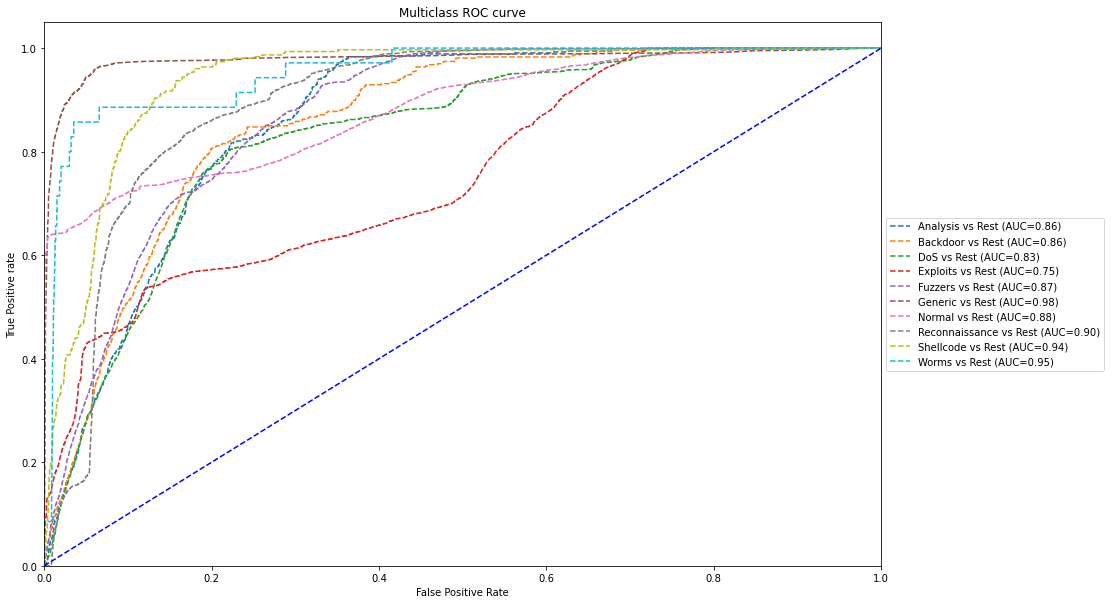

In [47]:
predict_gnb_proba = Gnb.predict_proba(X_test)
multiclass_ROC(y_test,predict_gnb_proba)

In [48]:
from sklearn.metrics import confusion_matrix
CM_GaussNB_multiclass = confusion_matrix(y_test,predict_gnb)
print('Confusion Matrix: GaussNB_Multiclass \n',CM_GaussNB_multiclass)

Confusion Matrix: GaussNB_Multiclass 
 [[    0    91    27   111    23    23     3   250     7     0]
 [    0    94    40     9    17    13     7   278     4     4]
 [    0   438   306   416   143    55    39  1828    45     1]
 [    0   537   455  3869   357    75   105  3431    66    10]
 [    0   138   126    88  1161   214    20  3061    41     0]
 [    0     7    14   127    77 10342     7  1194     3     3]
 [   62   337    97  1432  1093   453 11822  3271    33     0]
 [    0    65    58    27    33    21     2  2546    46     0]
 [    0     0     0     0     5     1     0   275    21     0]
 [    0     0     0     1     2     0     0    29     0     3]]


Testing With Random Forest

In [49]:
predict_RF = RF.predict(X_test)
RF.score(X_test,y_test)

0.8244105947414379

In [50]:
print("Classification Report: Random Forest \n", classification_report(y_test, predict_RF,digits=5))

Classification Report: Random Forest 
               precision    recall  f1-score   support

           0    0.96429   0.05047   0.09591       535
           1    0.74510   0.08155   0.14700       466
           2    0.33246   0.19505   0.24586      3271
           3    0.62306   0.84458   0.71711      8905
           4    0.69255   0.59786   0.64173      4849
           5    0.99818   0.97885   0.98842     11774
           6    0.91434   0.94231   0.92812     18600
           7    0.93046   0.75554   0.83393      2798
           8    0.66897   0.64238   0.65541       302
           9    1.00000   0.08571   0.15789        35

    accuracy                        0.82441     51535
   macro avg    0.78694   0.51743   0.54114     51535
weighted avg    0.82385   0.82441   0.81224     51535



In [51]:
roc_auc_score(y_test, RF.predict_proba(X_test), multi_class='ovr')

0.9618055908098302

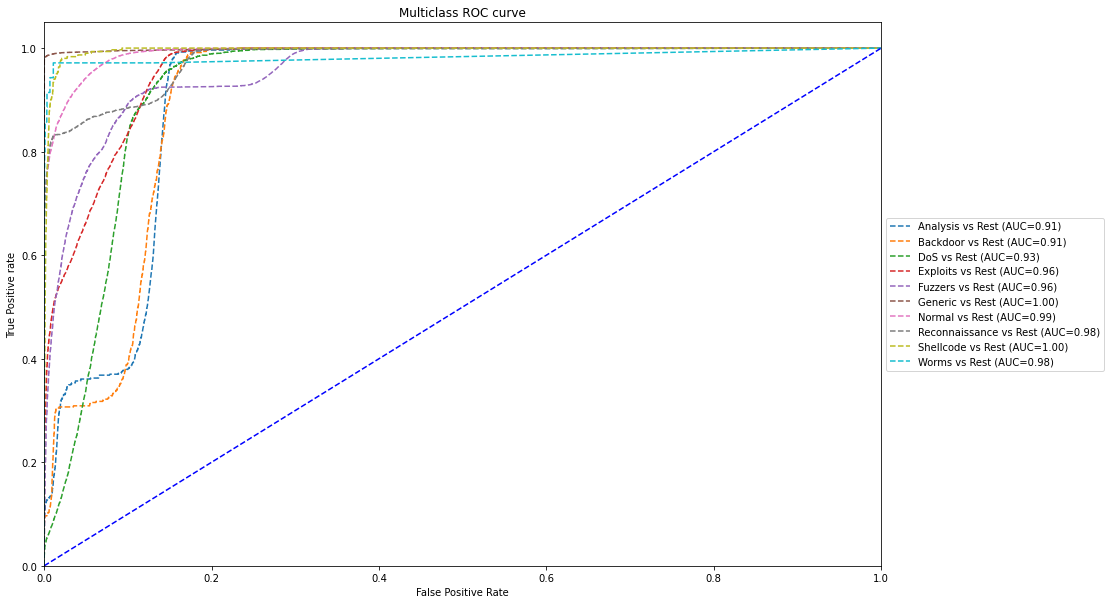

In [52]:
predict_RF_proba = RF.predict_proba(X_test)
multiclass_ROC(y_test,predict_RF_proba)

In [53]:
from sklearn.metrics import confusion_matrix
CM_RF_multiclass = confusion_matrix(y_test,predict_RF)
print('Confusion Matrix: RandomForest_Multiclass \n',CM_RF_multiclass)

Confusion Matrix: RandomForest_Multiclass 
 [[   27     0    75   319    31     0    83     0     0     0]
 [    0    38    92   305    27     0     0     1     3     0]
 [    0     3   638  2500    61     6    22    18    23     0]
 [    1     5   877  7521   194     6   151   120    30     0]
 [    0     2    81   500  2899     5  1341     2    19     0]
 [    0     2    36   171    22 11525     7     3     8     0]
 [    0     0     2   134   915     1 17527    10    11     0]
 [    0     1   117   550     5     0     9  2114     2     0]
 [    0     0     0    42    30     3    29     4   194     0]
 [    0     0     1    29     2     0     0     0     0     3]]


Testing with Logistic Regression

In [54]:
predict_lr = Lr.predict(X_test)
Lr.score(X_test,y_test)

0.7181915203259921

In [55]:
print("Classification Report: Logistic Regression \n", classification_report(y_test, predict_lr,digits=5))

Classification Report: Logistic Regression 
               precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       535
           1    0.00000   0.00000   0.00000       466
           2    0.33989   0.16386   0.22112      3271
           3    0.55651   0.65357   0.60115      8905
           4    0.45895   0.44504   0.45189      4849
           5    0.96833   0.97393   0.97112     11774
           6    0.79534   0.82382   0.80933     18600
           7    0.46413   0.61044   0.52732      2798
           8    0.00000   0.00000   0.00000       302
           9    0.00000   0.00000   0.00000        35

    accuracy                        0.71819     51535
   macro avg    0.35832   0.36706   0.35819     51535
weighted avg    0.69440   0.71819   0.70303     51535



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
roc_auc_score(y_test, Lr.predict_proba(X_test), multi_class='ovr')

0.9287867103303767

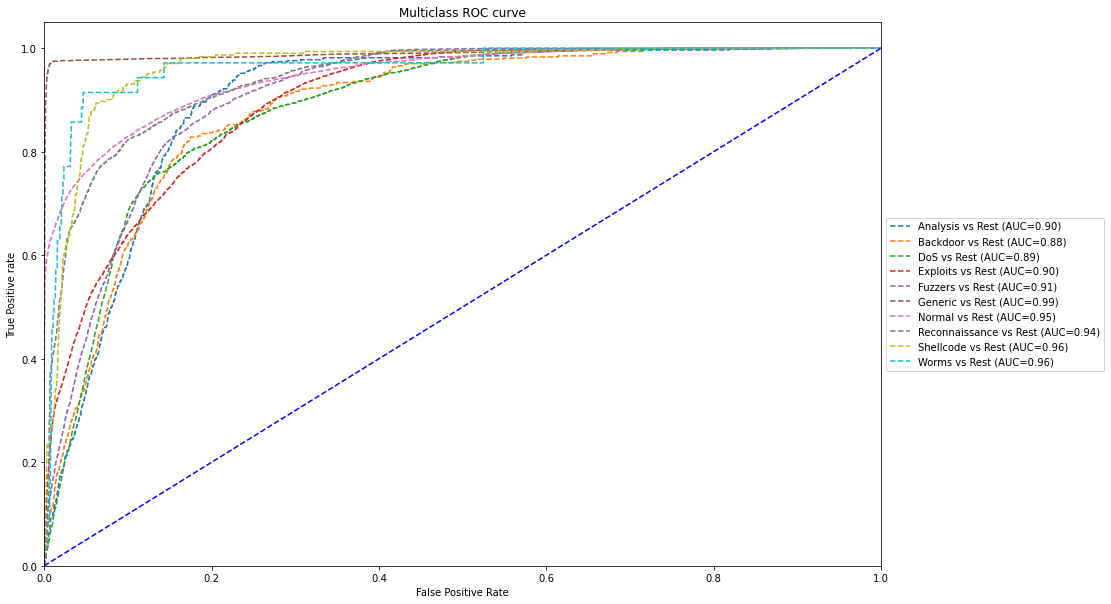

In [57]:
predict_lr_proba = Lr.predict_proba(X_test)
multiclass_ROC(y_test,predict_lr_proba)

In [58]:
from sklearn.metrics import confusion_matrix
CM_LR_multiclass = confusion_matrix(y_test,predict_lr)
print('Confusion Matrix: LogisticRegression_Multiclass \n',CM_LR_multiclass)

Confusion Matrix: LogisticRegression_Multiclass 
 [[    0     0    80   226    47    27   131    24     0     0]
 [    1     0    77   186    53    20    72    57     0     0]
 [    0     0   536  1549   136    83   636   331     0     0]
 [    4     0   663  5820   423   118  1355   522     0     0]
 [    3     0    95   762  2158    53  1422   356     0     0]
 [    0     0    12   155    42 11467    60    38     0     0]
 [    1     0    25  1096  1650    48 15323   456     1     0]
 [    0     0    89   590   159    23   229  1708     0     0]
 [    0     0     0    46    32     0    37   187     0     0]
 [    0     0     0    28     2     3     1     1     0     0]]


Testing with KNN classifier

In [59]:
predict_knn = Knn.predict(X_test)
Knn.score(X_test,y_test)

0.7999223828466091

In [60]:
print("Classification Report: KNN \n", classification_report(y_test, predict_knn,digits=5))

Classification Report: KNN 
               precision    recall  f1-score   support

           0    0.19565   0.08411   0.11765       535
           1    0.16923   0.04721   0.07383       466
           2    0.33060   0.39376   0.35943      3271
           3    0.66235   0.72937   0.69424      8905
           4    0.63396   0.55434   0.59148      4849
           5    0.99654   0.97800   0.98718     11774
           6    0.90292   0.91812   0.91046     18600
           7    0.77045   0.71015   0.73907      2798
           8    0.59429   0.34437   0.43606       302
           9    0.27273   0.08571   0.13043        35

    accuracy                        0.79992     51535
   macro avg    0.55287   0.48451   0.50398     51535
weighted avg    0.79770   0.79992   0.79723     51535



In [61]:
roc_auc_score(y_test, Knn.predict_proba(X_test), multi_class='ovr')

0.8376437626337836

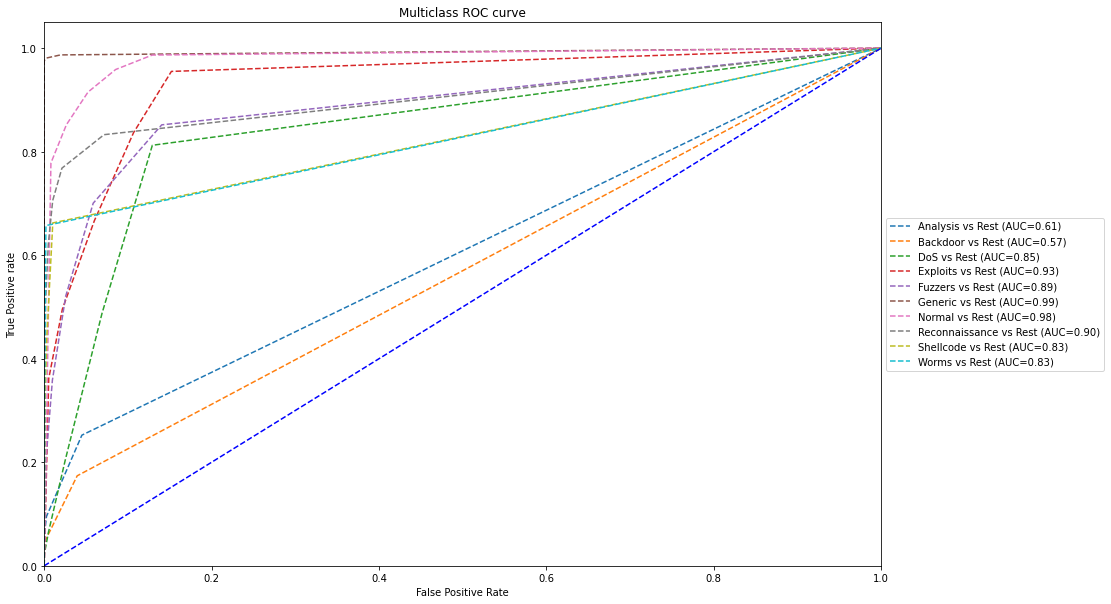

In [62]:
predict_knn_proba = Knn.predict_proba(X_test)
multiclass_ROC(y_test,predict_knn_proba)

In [63]:
from sklearn.metrics import confusion_matrix
CM_KNN_multiclass = confusion_matrix(y_test,predict_knn)
print('Confusion Matrix: KNN_Multiclass \n',CM_KNN_multiclass)

Confusion Matrix: KNN_Multiclass 
 [[   45    13   177   200    28     0    71     1     0     0]
 [   13    22   183   201    25     2     4    13     3     0]
 [   39    28  1288  1735    72     8    39    46    15     1]
 [   69    40  1667  6495   184    20   177   224    23     6]
 [   43    20   223   344  2688     4  1431    90     6     0]
 [    0     0    59   150    16 11515    12    14     8     0]
 [   20     3    50   163  1153     1 17077   118    15     0]
 [    1     4   234   452    45     2    72  1987     0     1]
 [    0     0    14    39    27     3    30    85   104     0]
 [    0     0     1    27     2     0     0     1     1     3]]


Testing Decision Tree

In [64]:
predict_dt = Dt.predict(X_test)
Dt.score(X_test,y_test)

0.8130202774813233

In [65]:
print("Classification Report: Decision Tree \n", classification_report(y_test, predict_dt,digits=5))

Classification Report: Decision Tree 
               precision    recall  f1-score   support

           0    0.63158   0.04486   0.08377       535
           1    0.63830   0.06438   0.11696       466
           2    0.45215   0.09966   0.16333      3271
           3    0.60630   0.90533   0.72624      8905
           4    0.67147   0.43287   0.52639      4849
           5    0.99474   0.98064   0.98764     11774
           6    0.87142   0.94989   0.90896     18600
           7    0.95499   0.70515   0.81127      2798
           8    0.46296   0.49669   0.47923       302
           9    0.61765   0.60000   0.60870        35

    accuracy                        0.81302     51535
   macro avg    0.69016   0.52795   0.54125     51535
weighted avg    0.80573   0.81302   0.78829     51535



In [66]:
roc_auc_score(y_test, Dt.predict_proba(X_test), multi_class='ovr')

0.9569427280703712

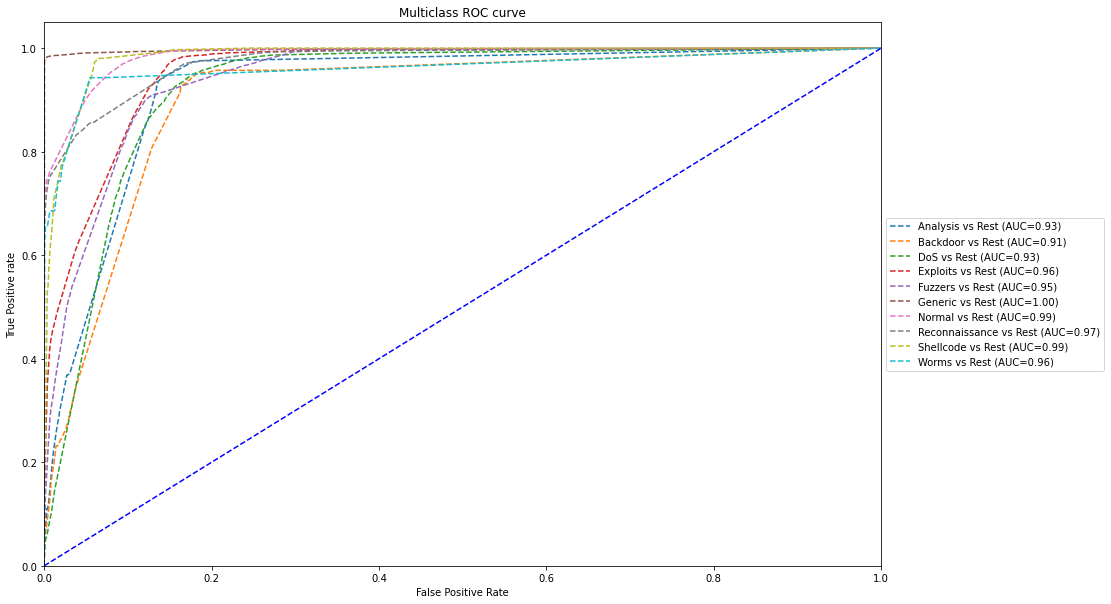

In [67]:
predict_dt_proba = Dt.predict_proba(X_test)
multiclass_ROC(y_test,predict_dt_proba)

In [68]:
from sklearn.metrics import confusion_matrix
CM_DT_multiclass = confusion_matrix(y_test,predict_dt)
print('Confusion Matrix: DecisionTree_Multiclass \n',CM_DT_multiclass)

Confusion Matrix: DecisionTree_Multiclass 
 [[   24     1    31   383    12     0    84     0     0     0]
 [    0    30    34   380    16     2     1     1     2     0]
 [    2     4   326  2783    45    16    49    10    33     3]
 [    6     6   253  8062   146    34   287    72    33     6]
 [    4     2    17   610  2099     5  2051     1    58     2]
 [    0     3    15   161    19 11546    15     2    13     0]
 [    2     1     4   130   758     1 17668     5    31     0]
 [    0     0    35   715     5     0    64  1973     4     2]
 [    0     0     6    62    25     2    55     2   150     0]
 [    0     0     0    11     1     1     1     0     0    21]]


Testing with ANN

test for XGB classifier

In [25]:
predict_xg = Xg.predict(X_test)
Xg.score(X_test,y_test)

0.825031531968565

In [26]:
print("Classification Report: \n", classification_report(y_test, predict_xg,digits=5))

Classification Report: 
               precision    recall  f1-score   support

           0    0.93548   0.05421   0.10247       535
           1    0.83673   0.08798   0.15922       466
           2    0.40587   0.10150   0.16239      3271
           3    0.61356   0.90466   0.73120      8905
           4    0.67971   0.58033   0.62610      4849
           5    0.99749   0.97749   0.98739     11774
           6    0.90616   0.93608   0.92088     18600
           7    0.91936   0.76197   0.83330      2798
           8    0.65441   0.58940   0.62021       302
           9    0.66667   0.45714   0.54237        35

    accuracy                        0.82503     51535
   macro avg    0.76154   0.54508   0.56855     51535
weighted avg    0.82216   0.82503   0.80526     51535



In [27]:
roc_auc_score(y_test, Xg.predict_proba(X_test), multi_class='ovr')

0.9695840997335683

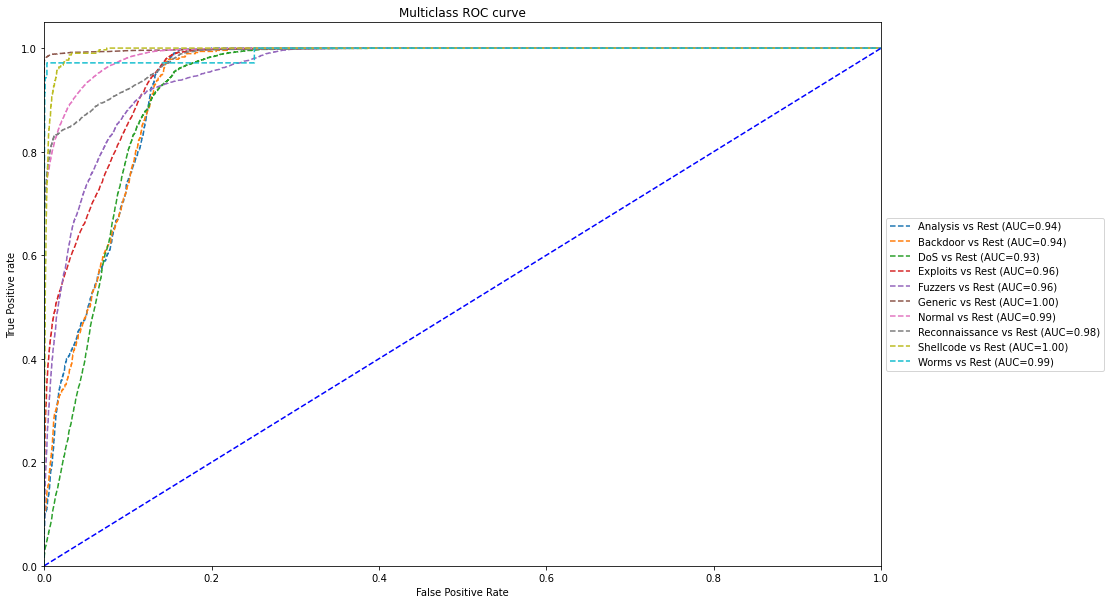

In [29]:
predict_xgb_proba = Xg.predict_proba(X_test)
multiclass_ROC(y_test,predict_xgb_proba)

In [30]:
from sklearn.metrics import confusion_matrix
CM_xgboost_multiclass = confusion_matrix(y_test,predict_xg)
print('Confusion Matrix: XGboost_Multiclass \n',CM_xgboost_multiclass)

Confusion Matrix: XGboost_Multiclass 
 [[   29     0    35   378    16     0    77     0     0     0]
 [    0    41    38   371    13     0     0     1     2     0]
 [    0     2   332  2791    68     8    31    16    22     1]
 [    1     1   316  8056   155    11   198   128    32     7]
 [    0     0    34   538  2814     4  1440     4    15     0]
 [    0     2    12   198    29 11509    14     2     8     0]
 [    1     0     2   149  1001     0 17411    24    12     0]
 [    0     3    49   590     6     2    13  2132     3     0]
 [    0     0     0    44    36     3    29    12   178     0]
 [    0     0     0    15     2     1     1     0     0    16]]


Testing with Adaboost

In [69]:
predict_ada = Ada.predict(X_test)
Ada.score(X_test,y_test)

0.7101387406616863

In [70]:
print("Classification Report: Adaboost \n", classification_report(y_test, predict_ada,digits=5))

Classification Report: Adaboost 
               precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       535
           1    0.00000   0.00000   0.00000       466
           2    0.00000   0.00000   0.00000      3271
           3    0.58973   0.67052   0.62754      8905
           4    0.37577   0.41761   0.39559      4849
           5    0.86339   0.89536   0.87909     11774
           6    0.80189   0.85785   0.82893     18600
           7    0.53840   0.75161   0.62739      2798
           8    0.00000   0.00000   0.00000       302
           9    0.00000   0.00000   0.00000        35

    accuracy                        0.71014     51535
   macro avg    0.31692   0.35930   0.33585     51535
weighted avg    0.65316   0.71014   0.67974     51535



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
roc_auc_score(y_test, Ada.predict_proba(X_test), multi_class='ovr')

0.8738986222247995

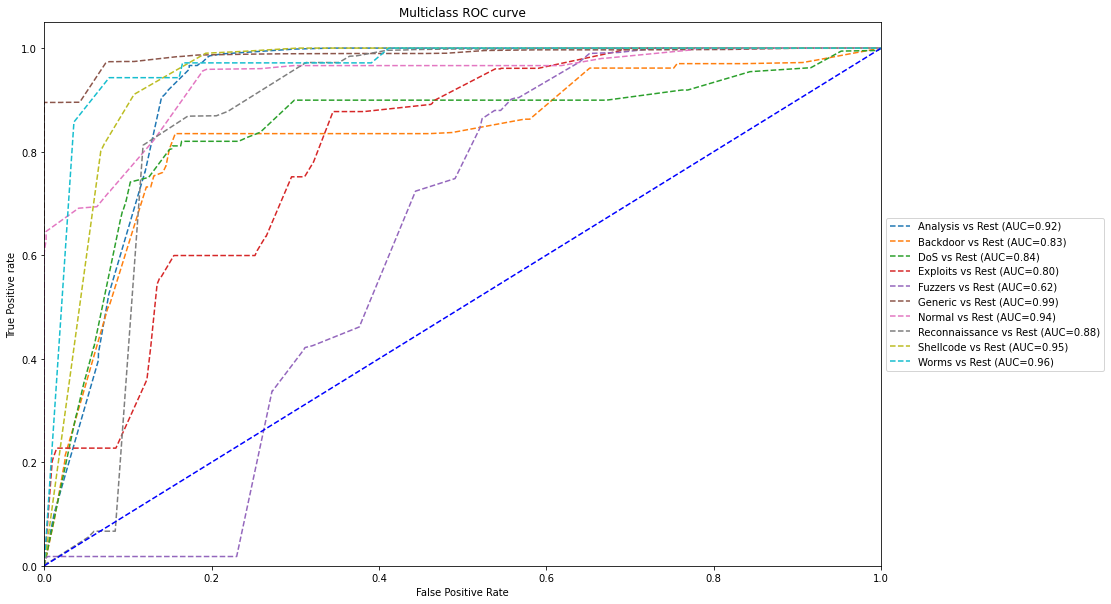

In [72]:
predict_ada_proba = Ada.predict_proba(X_test)
multiclass_ROC(y_test,predict_ada_proba)

In [73]:
from sklearn.metrics import confusion_matrix
CM_Adaboost_multiclass = confusion_matrix(y_test,predict_ada)
print('Confusion Matrix: Adaboos_Multiclass \n',CM_Adaboost_multiclass)

Confusion Matrix: Adaboos_Multiclass 
 [[    0     0     0   321     0   129    82     3     0     0]
 [    0     0     0   280     6   105    19    56     0     0]
 [    0     0     0  2364   130   461   137   179     0     0]
 [    0     0     0  5971   989   568   738   639     0     0]
 [    0     0     0   456  2025   274  1752   342     0     0]
 [    0     0     0   195    67 10542   936    34     0     0]
 [    0     7     0   191  2076    62 15956   308     0     0]
 [    0     0     0   344    35    69   247  2103     0     0]
 [    0     0     0     0    31     0    29   242     0     0]
 [    0     0     0     3    30     0     2     0     0     0]]


GradientBoost

In [88]:
predict_gradboost = gradboost.predict(X_test)
gradboost.score(X_test,y_test)

0.003997283399631318

In [89]:
print("Classification Report: GradientBoost \n", classification_report(y_test, predict_gradboost,digits=5))

Classification Report: GradientBoost 
               precision    recall  f1-score   support

           0    0.00232   0.07290   0.00450       535
           1    0.09091   0.00215   0.00419       466
           2    0.42857   0.00092   0.00183      3271
           3    0.76106   0.00966   0.01907      8905
           4    0.33333   0.00062   0.00124      4849
           5    0.00000   0.00000   0.00000     11774
           6    0.66667   0.00011   0.00022     18600
           7    0.30000   0.01716   0.03245      2798
           8    0.00067   0.07616   0.00133       302
           9    0.02632   0.02857   0.02740        35

    accuracy                        0.00400     51535
   macro avg    0.26098   0.02082   0.00922     51535
weighted avg    0.44784   0.00400   0.00548     51535



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
roc_auc_score(y_test, gradboost.predict_proba(X_test), multi_class='ovr')

0.46023094793652597

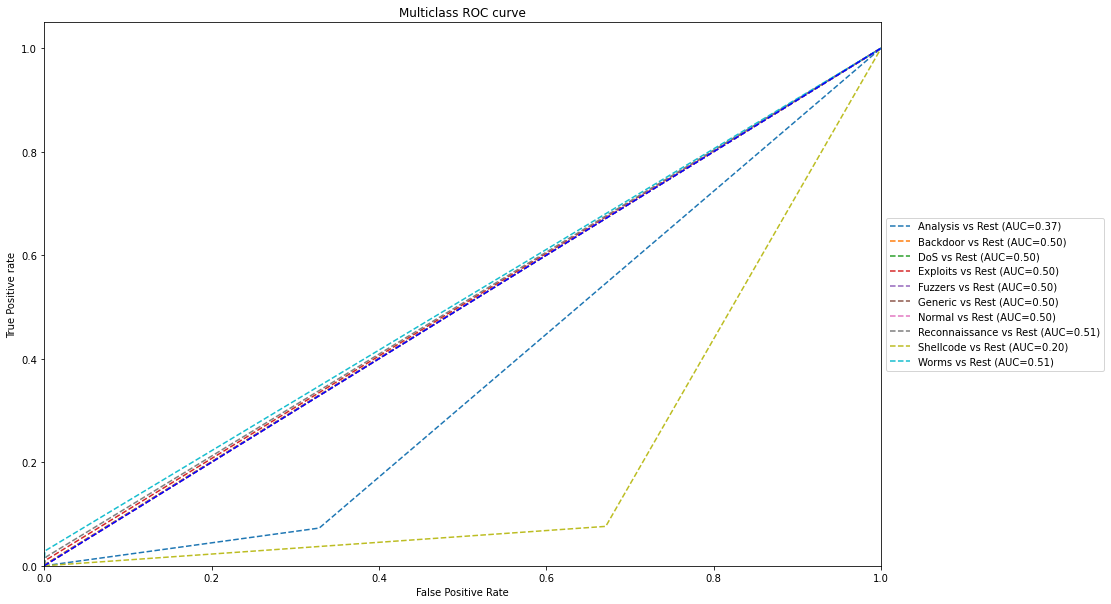

In [91]:
predict_gradboost_proba = gradboost.predict_proba(X_test)
multiclass_ROC(y_test,predict_gradboost_proba)

In [92]:
from sklearn.metrics import confusion_matrix
CM_gradboost_multiclass = confusion_matrix(y_test,predict_gradboost)
print('Confusion Matrix: Gradboost_Multiclass \n',CM_gradboost_multiclass)

Confusion Matrix: Gradboost_Multiclass 
 [[   39     0     0     0     0     0     0     5   491     0]
 [   99     1     0     1     0     0     0     3   362     0]
 [  903     3     3     8     1     0     1    27  2322     3]
 [ 5400     6     3    86     1     0     0    65  3324    20]
 [  985     0     0     4     3     0     0     6  3847     4]
 [  261     0     0     2     0     0     0     1 11510     0]
 [ 6574     0     0    12     3     0     2     1 11998    10]
 [ 2229     1     1     0     0     0     0    48   519     0]
 [  274     0     0     0     1     0     0     4    23     0]
 [   34     0     0     0     0     0     0     0     0     1]]


Extra Tree Classifer

In [79]:
predict_extree = Ex_tree.predict(X_test)
Ex_tree.score(X_test,y_test)

0.8233045503056176

In [80]:
print("Classification Report: EXTRA tree  \n", classification_report(y_test, predict_extree,digits=5))

Classification Report: EXTRA tree  
               precision    recall  f1-score   support

           0    0.54206   0.10841   0.18069       535
           1    0.68657   0.09871   0.17261       466
           2    0.34088   0.31305   0.32637      3271
           3    0.64340   0.78271   0.70625      8905
           4    0.69485   0.62363   0.65732      4849
           5    0.99612   0.98148   0.98875     11774
           6    0.92046   0.93941   0.92984     18600
           7    0.90725   0.75161   0.82213      2798
           8    0.65637   0.56291   0.60606       302
           9    0.45455   0.14286   0.21739        35

    accuracy                        0.82330     51535
   macro avg    0.68425   0.53048   0.56074     51535
weighted avg    0.82323   0.82330   0.81786     51535



In [81]:
roc_auc_score(y_test, Ex_tree.predict_proba(X_test), multi_class='ovr')

0.9037359747077994

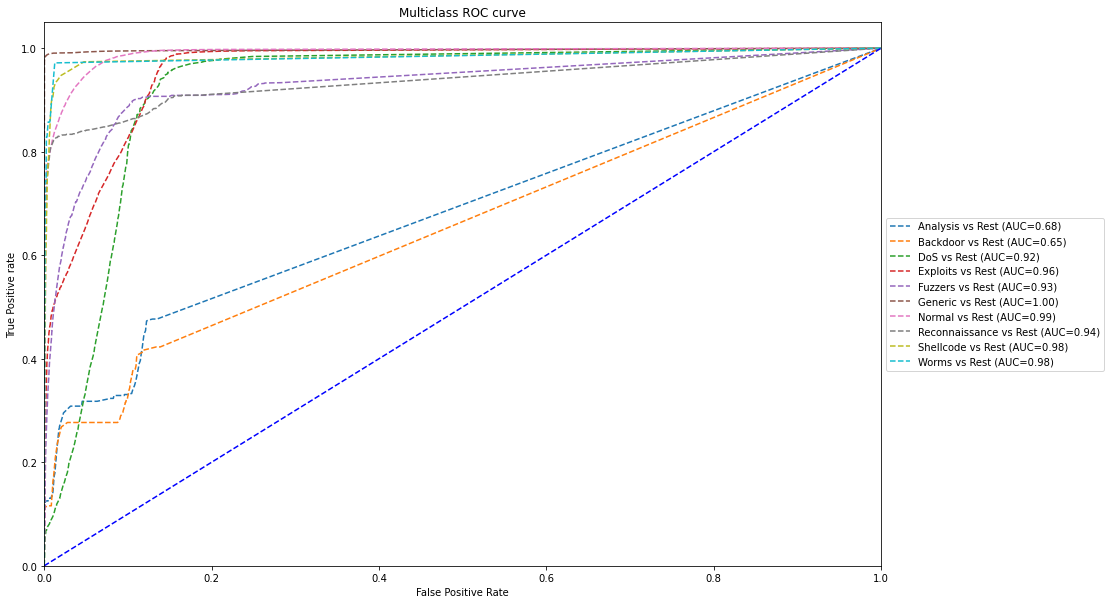

In [83]:
predict_extree_proba = Ex_tree.predict_proba(X_test)
multiclass_ROC(y_test,predict_extree_proba)

In [82]:
from sklearn.metrics import confusion_matrix
CM_extraTree_multiclass = confusion_matrix(y_test,predict_extree)
print('Confusion Matrix: Extra Tree_Multiclass \n',CM_extraTree_multiclass)

Confusion Matrix: Extra Tree_Multiclass 
 [[   58     2   123   270    32     0    50     0     0     0]
 [    1    46   146   236    31     1     1     1     3     0]
 [   11     3  1024  2114    50     6    28    19    16     0]
 [   18     9  1346  6970   196    25   156   149    33     3]
 [   18     4   123   447  3024     6  1203     8    15     1]
 [    0     2    44   136    13 11556    12     2     8     1]
 [    1     0     8   109   973     4 17473    20    11     1]
 [    0     1   181   480     8     2    20  2103     3     0]
 [    0     0     8    43    24     1    40    16   170     0]
 [    0     0     1    28     1     0     0     0     0     5]]
